In [43]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [44]:
uploaded=files.upload()

Saving hotel_bookings.csv to hotel_bookings (1).csv


In [45]:
df = pd.read_csv('hotel_bookings.csv')

In [46]:
df.shape

(119390, 32)

In [47]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [48]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [49]:
df.dtypes

,0
hotel,object
is_canceled,int64
lead_time,int64
arrival_date_year,int64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64


In [50]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [52]:
#checking missing values
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_info = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})
missing_info = missing_info[missing_info['Missing Count'] > 0].sort_values(by='Missing Percentage', ascending=False)
print("\nMissing values count and percentage per column:")
print(missing_info)


Missing values count and percentage per column:
          Missing Count  Missing Percentage
company          112593           94.306893
agent             16340           13.686238
country             488            0.408744
children              4            0.003350



Generating missingno matrix to visualize missing data patterns...


<Figure size 1200x800 with 0 Axes>

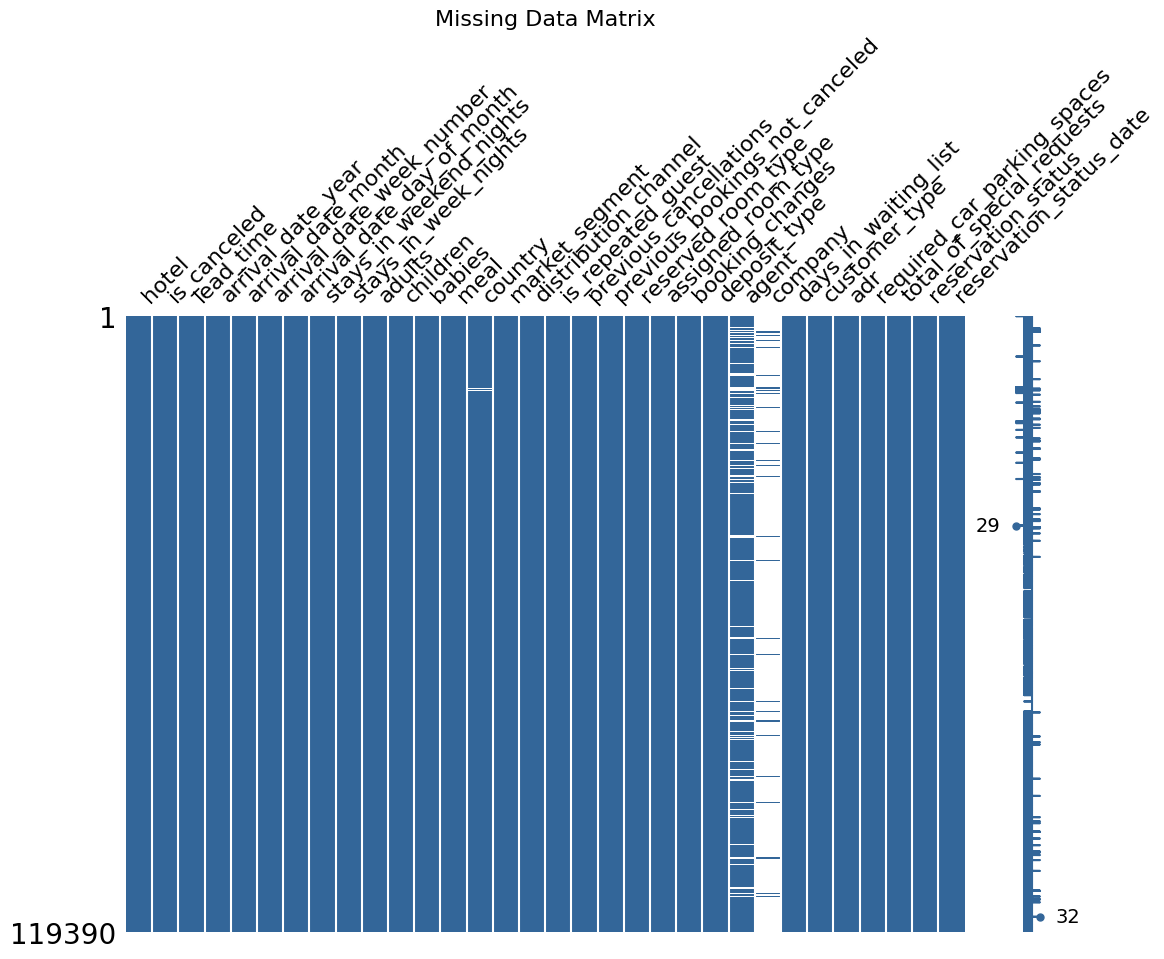

In [53]:
#visualization of the missing values
print("\nGenerating missingno matrix to visualize missing data patterns...")
plt.figure(figsize=(12, 8))
msno.matrix(df, figsize=(12, 8), color=(0.2, 0.4, 0.6))
plt.title('Missing Data Matrix', fontsize=16)
plt.show()

In [54]:
#defining key numerical columns for outlier detection
numerical_cols = ['adr', 'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies']
print(f"\nDetecting outliers in: {', '.join(numerical_cols)}")


Detecting outliers in: adr, lead_time, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies


In [55]:
#outliers detection
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers, lower_bound, upper_bound

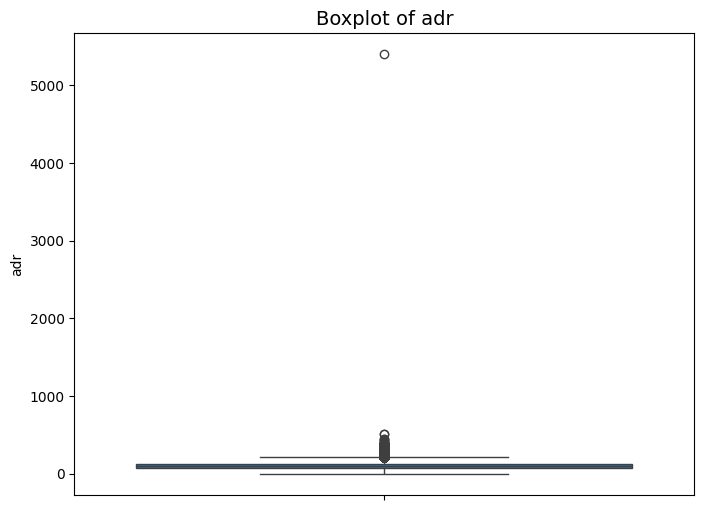


Outlier analysis for 'adr':
  Number of Outliers: 3793
  Percentage of Outliers: 3.18%
  Lower Bound (IQR): -15.774999999999991
  Upper Bound (IQR): 211.065
  Min Outlier Value: 211.08
  Max Outlier Value: 5400.0


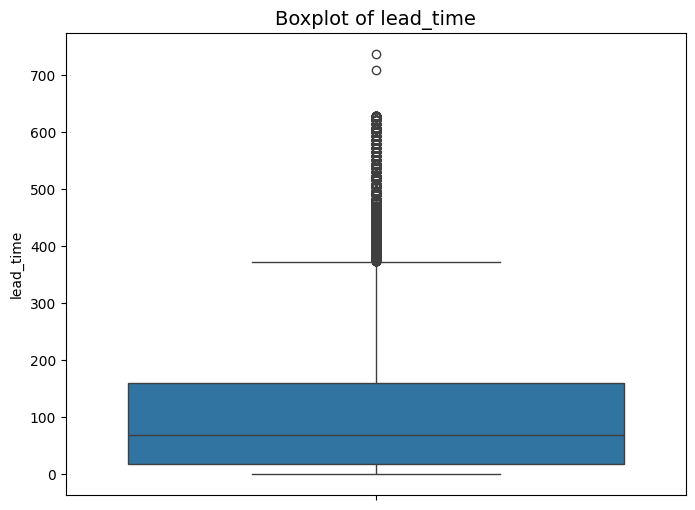


Outlier analysis for 'lead_time':
  Number of Outliers: 3005
  Percentage of Outliers: 2.52%
  Lower Bound (IQR): -195.0
  Upper Bound (IQR): 373.0
  Min Outlier Value: 374
  Max Outlier Value: 737


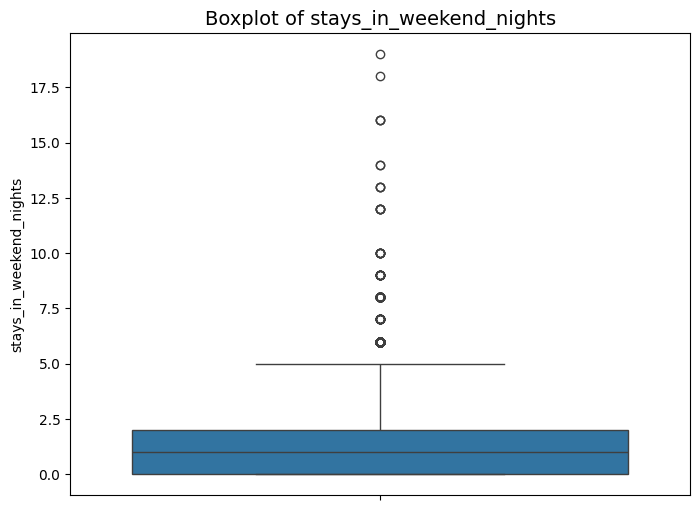


Outlier analysis for 'stays_in_weekend_nights':
  Number of Outliers: 265
  Percentage of Outliers: 0.22%
  Lower Bound (IQR): -3.0
  Upper Bound (IQR): 5.0
  Min Outlier Value: 6
  Max Outlier Value: 19


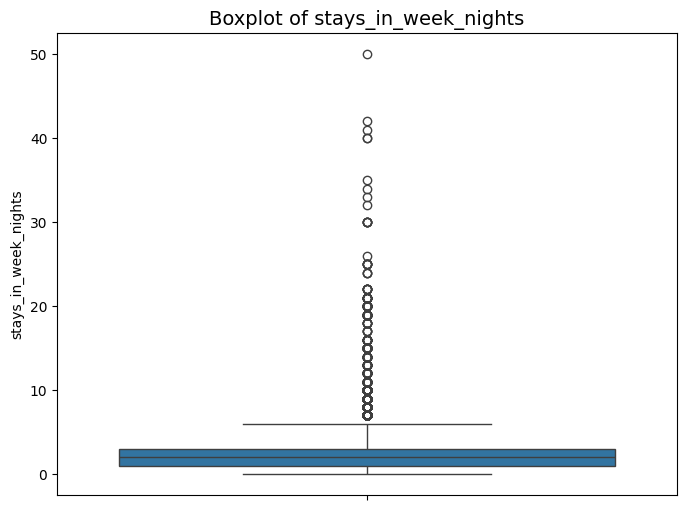


Outlier analysis for 'stays_in_week_nights':
  Number of Outliers: 3354
  Percentage of Outliers: 2.81%
  Lower Bound (IQR): -2.0
  Upper Bound (IQR): 6.0
  Min Outlier Value: 7
  Max Outlier Value: 50


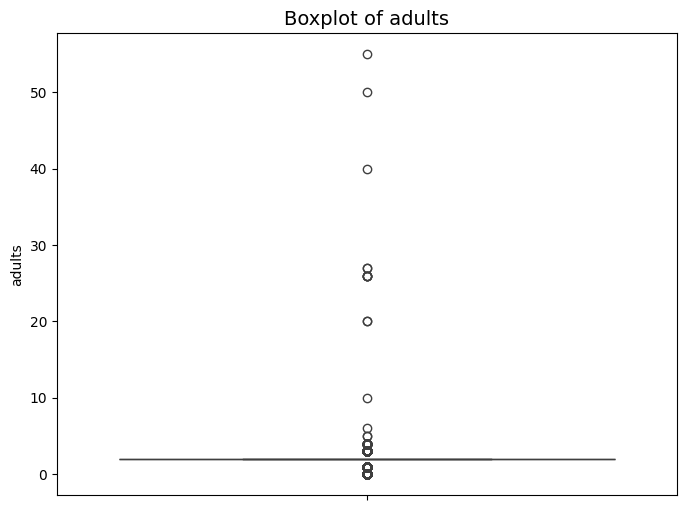


Outlier analysis for 'adults':
  Number of Outliers: 29710
  Percentage of Outliers: 24.88%
  Lower Bound (IQR): 2.0
  Upper Bound (IQR): 2.0
  Min Outlier Value: 0
  Max Outlier Value: 55


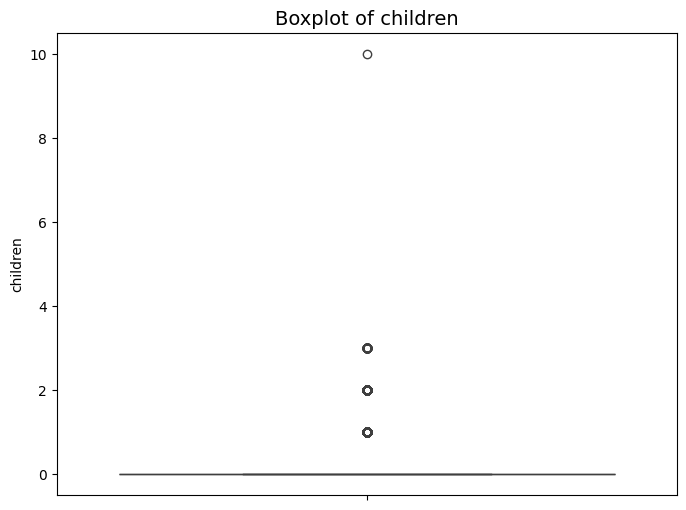


Outlier analysis for 'children':
  Number of Outliers: 8590
  Percentage of Outliers: 7.20%
  Lower Bound (IQR): 0.0
  Upper Bound (IQR): 0.0
  Min Outlier Value: 1.0
  Max Outlier Value: 10.0


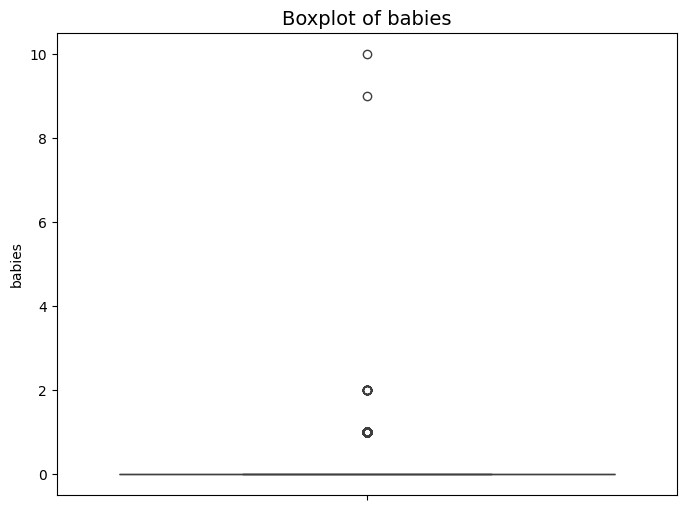


Outlier analysis for 'babies':
  Number of Outliers: 917
  Percentage of Outliers: 0.77%
  Lower Bound (IQR): 0.0
  Upper Bound (IQR): 0.0
  Min Outlier Value: 1
  Max Outlier Value: 10


In [56]:
#outliers visualization
outlier_findings = {}
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}', fontsize=14)
    plt.ylabel(col)
    plt.show()

    outliers, lower_bound, upper_bound = detect_outliers_iqr(df[col].dropna()) # Drop NA for outlier detection
    num_outliers = len(outliers)
    percentage_outliers = (num_outliers / len(df[col].dropna())) * 100
    outlier_findings[col] = {
        'Number of Outliers': num_outliers,
        'Percentage of Outliers': f"{percentage_outliers:.2f}%",
        'Lower Bound (IQR)': lower_bound,
        'Upper Bound (IQR)': upper_bound,
        'Min Outlier Value': outliers.min() if not outliers.empty else 'N/A',
        'Max Outlier Value': outliers.max() if not outliers.empty else 'N/A'
    }
    print(f"\nOutlier analysis for '{col}':")
    for key, value in outlier_findings[col].items():
        print(f"  {key}: {value}")

Some columns have missing values notably company and agent which show a high proportion of missing entries This likely reflects the nature of the data many bookings may not involve a company or agent Other columns like country and children have only a small number of missing values which can be handled

Key numerical columns such as adr and lead_time contain outliers for example adr includes some zero and very high values which might represent free stays or data entry errors similarly lead_time has some unusually large values indicating bookings made far in advance other stay-related columns and guest counts also show some extreme values which could be valid and could be misleading or inaccurate

In [57]:
#handling the missing data
df['company'].fillna('None', inplace=True)
df['agent'].fillna('None', inplace=True)

mode_country = df['country'].mode()[0]
df['country'].fillna(mode_country, inplace=True)

median_children = df['children'].median()
df.loc[:, 'children'] = df['children'].fillna(median_children)

/tmp/ipython-input-3914609537.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['company'].fillna('None', inplace=True)
/tmp/ipython-input-3914609537.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['company'].fillna('None', inplace=True)
/tmp/ipython-input-3914609537.py:3: FutureWarning: A value is trying to be set on a copy of a DataFram

In [58]:
#removing the duplicates
print("\n--- Removing Duplicate Rows ---")
initial_shape = df.shape
df = df.drop_duplicates()
final_shape = df.shape
print(f"Removed {initial_shape[0] - final_shape[0]} duplicate rows.")
print(f"Data shape after removing duplicates: {final_shape}")


--- Removing Duplicate Rows ---
Removed 32013 duplicate rows.
Data shape after removing duplicates: (87377, 32)


In [59]:
#handling outliers
adr_cap = 1000
num_capped = (df['adr'] > adr_cap).sum()
print(f"Number of 'adr' values above {adr_cap}: {num_capped}")
# Cap the values
df.loc[df['adr'] > adr_cap, 'adr'] = adr_cap

Number of 'adr' values above 1000: 1


In [60]:
#fixing datatypes
date_columns = ['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']
#converting
# Map month names to numbers
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df['arrival_date_month'] = df['arrival_date_month'].map(month_map)

date_df = df[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']].copy()
date_df.columns = ['year', 'month', 'day']
df['arrival_date'] = pd.to_datetime(date_df)

In [61]:
#feature creation
df['total_guests'] = df['adults'] + df['children'].fillna(0) + df['babies'].fillna(0)

df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

df['is_family'] = np.where((df['children'].fillna(0) > 0) | (df['babies'].fillna(0) > 0), 'Yes', 'No')


In [62]:
#one-hot encoding for low cardinality columns
low_cardinality_columns = ['meal', 'market_segment']
df = pd.get_dummies(df, columns=low_cardinality_columns, drop_first=True)
print(f"One-hot encoded columns: {low_cardinality_columns}")

One-hot encoded columns: ['meal', 'market_segment']


In [63]:
#handling high cardinality columns
#grouping infrequent countries into other
if 'country' in df.columns:
    country_counts = df['country'].value_counts()
    threshold = 100
    countries_to_keep = country_counts[country_counts >= threshold].index
    df['country_grouped'] = df['country'].where(df['country'].isin(countries_to_keep), other='Other')
    #frequency encoding for country_grouped
    freq_encoding = df['country_grouped'].value_counts(normalize=True)
    df['country_freq_enc'] = df['country_grouped'].map(freq_encoding)
    #droping original 'country' and 'country_grouped' columns
    df.drop(columns=['country', 'country_grouped'], inplace=True)
else:
    print("'country' column not found. It may have been dropped in a previous execution.")

In [64]:
# removing data leakage
leakage_cols = ['reservation_status', 'reservation_status_date']
df.drop(columns=leakage_cols, inplace=True)
#removed the reservation status and the reservation status date because they contain future info unavailable at prediction time

In [65]:
#the final preparation (spliting the data)
target = 'is_canceled'
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)